In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from itertools import product

import matplotlib.pyplot as plt
%matplotlib inline
from os.path import join
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.python.keras.models import load_model


In [ ]:
k_mer = []
for i in product(['A', 'T', 'G', 'C', 'D'],repeat=3):
    k_mer.append(''.join(i))
    print(i, end=" ")
print(k_mer)

('A', 'A', 'A') ('A', 'A', 'T') ('A', 'A', 'G') ('A', 'A', 'C') ('A', 'A', 'D') ('A', 'T', 'A') ('A', 'T', 'T') ('A', 'T', 'G') ('A', 'T', 'C') ('A', 'T', 'D') ('A', 'G', 'A') ('A', 'G', 'T') ('A', 'G', 'G') ('A', 'G', 'C') ('A', 'G', 'D') ('A', 'C', 'A') ('A', 'C', 'T') ('A', 'C', 'G') ('A', 'C', 'C') ('A', 'C', 'D') ('A', 'D', 'A') ('A', 'D', 'T') ('A', 'D', 'G') ('A', 'D', 'C') ('A', 'D', 'D') ('T', 'A', 'A') ('T', 'A', 'T') ('T', 'A', 'G') ('T', 'A', 'C') ('T', 'A', 'D') ('T', 'T', 'A') ('T', 'T', 'T') ('T', 'T', 'G') ('T', 'T', 'C') ('T', 'T', 'D') ('T', 'G', 'A') ('T', 'G', 'T') ('T', 'G', 'G') ('T', 'G', 'C') ('T', 'G', 'D') ('T', 'C', 'A') ('T', 'C', 'T') ('T', 'C', 'G') ('T', 'C', 'C') ('T', 'C', 'D') ('T', 'D', 'A') ('T', 'D', 'T') ('T', 'D', 'G') ('T', 'D', 'C') ('T', 'D', 'D') ('G', 'A', 'A') ('G', 'A', 'T') ('G', 'A', 'G') ('G', 'A', 'C') ('G', 'A', 'D') ('G', 'T', 'A') ('G', 'T', 'T') ('G', 'T', 'G') ('G', 'T', 'C') ('G', 'T', 'D') ('G', 'G', 'A') ('G', 'G', 'T') ('G', 'G

In [ ]:
k_mer = pd.DataFrame(k_mer)

In [ ]:
ohencoder = OneHotEncoder()
ohencoder.fit(k_mer)

OneHotEncoder()

In [ ]:
k_mer_oh = ohencoder.transform(k_mer).toarray()

In [ ]:
k_mer_dict = dict()
for i in range(125):
  k_mer_dict[k_mer[0][i]] = k_mer_oh[i]

In [ ]:
res_list = []
for i in range(125):
  k_mer_dict[k_mer[0][i]] = list(map(int, (k_mer_dict[k_mer[0][i]])))

In [ ]:
def sequence_to_onehot2(_datax):
  res_list = []
  for i in range(len(_datax)):
    tmp =list()
    for j in range(len(_datax[i])-3):
      tmp.append(k_mer_dict[str(_datax[i][j:j+3])])
    res_list.append(np.array(tmp))
  res_np = np.array(res_list)
  return res_np
  

In [ ]:
# data shuffle
df_shuffled = pd.read_csv('data.csv').sample(frac=1).reset_index(drop=True)

# x, y 분류. numpy로 변환 후 1차원으로 reshape, sequence onehot encoding
datax = sequence_to_onehot2(df_shuffled.iloc[:,[0,]].to_numpy().reshape(-1))
datay = df_shuffled.iloc[:,[2,]].to_numpy().reshape(-1)


In [ ]:
print(datax.shape)

(211, 5597, 125)


In [ ]:
# Train, Test Split 
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size = 0.2, random_state =111)

print(f"Train = {trnx.shape[0]}개, Test = {tstx.shape[0]}개")
print(f"trnx.shape = {trnx.shape}")
print(f"tstx.shape = {tstx.shape}")
print(f"trny.shape = {trny.shape}")
print(f"tsty.shape = {tsty.shape}")



Train = 168개, Test = 43개
trnx.shape = (168, 5597, 125)
tstx.shape = (43, 5597, 125)
trny.shape = (168,)
tsty.shape = (43,)


In [ ]:
input_shape = (5597,125,1)
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(16,(2,2), padding='same', input_shape=input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(16,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 100, activation = "relu"))
cnn_model.add(layers.Dense(units = 1, activation = "sigmoid"))


In [ ]:
opt = optimizers.SGD(lr=0.01)
cnn_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 5597, 125, 16)     80        
                                                                 
 batch_normalization_2 (Batc  (None, 5597, 125, 16)    64        
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 5597, 125, 16)     0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2798, 62, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2798, 62, 16)      1040      
                                                                 
 batch_normalization_3 (Batc  (None, 2798, 62, 16)    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
histroy = cnn_model.fit(trnx.reshape(-1,5597,125,1), trny, validation_data = [tstx.reshape(-1,5597,125,1),tsty], batch_size=10, epochs = 5)

Epoch 1/5
17/17 [==============================] - 4s 176ms/step - loss: 104.0966 - accuracy: 0.5833 - val_loss: 3.6717 - val_accuracy: 0.7209
Epoch 2/5
17/17 [==============================] - 3s 161ms/step - loss: 35.8845 - accuracy: 0.6786 - val_loss: 2.2248 - val_accuracy: 0.5116
Epoch 3/5
17/17 [==============================] - 3s 159ms/step - loss: 8.9602 - accuracy: 0.6667 - val_loss: 2.3347 - val_accuracy: 0.5116
Epoch 4/5
17/17 [==============================] - 3s 157ms/step - loss: 5.9504 - accuracy: 0.7381 - val_loss: 6.2307 - val_accuracy: 0.5116
Epoch 5/5
17/17 [==============================] - 3s 156ms/step - loss: 1.1996 - accuracy: 0.8571 - val_loss: 8.7712 - val_accuracy: 0.5116


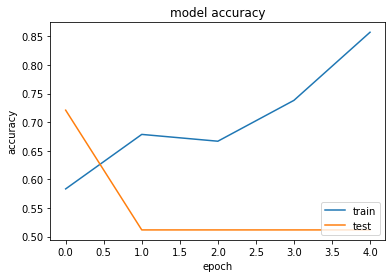

In [ ]:
# Model Performance (Measurement = Accuracy)
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()


In [ ]:
cnn_model.save('save')

INFO:tensorflow:Assets written to: save/assets


In [ ]:
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
import numpy as np
from numpy import argmax
from tensorflow.python.keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from itertools import product

import matplotlib.pyplot as plt
%matplotlib inline
from os.path import join
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.python.keras.models import load_model

model = load_model('save')
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
xhat = datax[198].reshape(-1,5597,125,1)
yhat = probability_model.predict(xhat)
print(yhat)
print('Predict : ',str(yhat))

[[1.]]
Predict :  [[1.]]
